# 1. The Human Eye


In [134]:
from math import pi, tan

In [135]:
TV_RESOLUTION = int(input("Please enter the TV resolution in pixels: "))
if TV_RESOLUTION <= 2:
    print("Please enter a good resolution!")
    exit()
TV_WIDTH = int(input("Please enter the TV width in inches: "))
if TV_WIDTH <= 0:
    print("Please enter a positive width!")
    exit()
ROOM_LENGTH = int(input("Please enter the room length in feet: "))
if ROOM_LENGTH <= 0:
    print("Please enter a positive length!")
    exit()


## How it works

```text
                |-30cycles-|
                |-- 60px --|
_______________________________TV__
 |   \          |          /
 |    \         |         /
 |     \        |        /
 |      \       |       /
 |       \      |      /
(d)       \     |     /
 |         \    | ½° /
 |          \   |___/
 |           \  |  /
 |            \ | /
 |             \|/
___           (eye)

```


In [136]:
d = (60*(TV_WIDTH/TV_RESOLUTION)/tan(pi/360))/12

In [137]:
print(
    "The distance between the TV and the couch should be ", min(ROOM_LENGTH, d), "feet"
)


The distance between the TV and the couch should be  8.20621843373962 feet


# 2. Gray Scale Images


In [138]:
from matplotlib import pyplot as plt, image as mpimg
from math import log2, ceil
import os

aerial = mpimg.imread("aerial.tiff")
airplane = mpimg.imread("airplane.tiff")
APC = mpimg.imread("APC.tiff")


## 2.1 Display the images


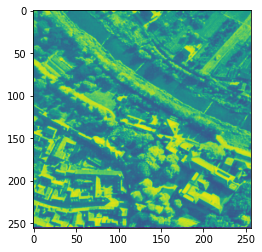

In [139]:

plt.imshow(aerial)


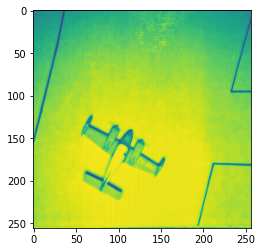

In [140]:
plt.imshow(airplane)


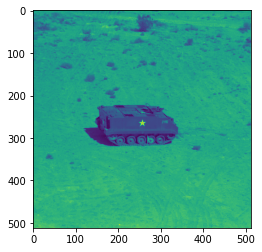

In [141]:
plt.imshow(APC)


## 2.2 Max and min pixel values

In [142]:
maxVal = aerial[0][0]
minVal = aerial[0][0]
for i in range(len(aerial)):
    for j in range(len(aerial[i])):
        if maxVal < aerial[i][j]:
            maxVal = aerial[i][j]
        if minVal > aerial[i][j]:
            minVal = aerial[i][j]
bitsNeeded = ceil(log2(maxVal - minVal))
IMAGE_WIDTH = len(aerial[0])
IMAGE_HEIGHT = len(aerial)
aerialImageSize = IMAGE_WIDTH * IMAGE_HEIGHT * bitsNeeded
print("aerial.tiff")
print("Resolution: " + str(IMAGE_WIDTH) + "x" + str(IMAGE_HEIGHT))
print("Max value: " + str(maxVal))
print("Min value: " + str(minVal))
print("Bits needed: " + str(bitsNeeded))

aerial.tiff
Resolution: 256x256
Max value: 248
Min value: 1
Bits needed: 8


In [143]:
maxVal = airplane[0][0]
minVal = airplane[0][0]
for i in range(len(airplane)):
    for j in range(len(airplane[i])):
        if maxVal < airplane[i][j]:
            maxVal = airplane[i][j]
        if minVal > airplane[i][j]:
            minVal = airplane[i][j]
bitsNeeded = ceil(log2(maxVal - minVal))
IMAGE_WIDTH = len(airplane[0])
IMAGE_HEIGHT = len(airplane)
airplaneImageSize = IMAGE_WIDTH * IMAGE_HEIGHT * bitsNeeded
print("airplane.tiff")
print("Resolution: " + str(IMAGE_WIDTH) + "x" + str(IMAGE_HEIGHT))
print("Max value: " + str(maxVal))
print("Min value: " + str(minVal))
print("Bits needed: " + str(bitsNeeded))


airplane.tiff
Resolution: 256x256
Max value: 232
Min value: 0
Bits needed: 8


In [144]:
maxVal = APC[0][0]
minVal = APC[0][0]
for i in range(len(APC)):
    for j in range(len(APC[i])):
        if maxVal < APC[i][j]:
            maxVal = APC[i][j]
        if minVal > APC[i][j]:
            minVal = APC[i][j]
bitsNeeded = ceil(log2(maxVal - minVal))
IMAGE_WIDTH = len(APC[0])
IMAGE_HEIGHT = len(APC)
APCImageSize = IMAGE_WIDTH * IMAGE_HEIGHT * bitsNeeded
print("APC.tiff")
print("Resolution: " + str(IMAGE_WIDTH) + "x" + str(IMAGE_HEIGHT))
print("Max value: " + str(maxVal))
print("Min value: " + str(minVal))
print("Bits needed: " + str(bitsNeeded))


APC.tiff
Resolution: 512x512
Max value: 215
Min value: 12
Bits needed: 8


## 2.3 Compression

In [145]:
aerialFilesize = os.path.getsize("./aerial.tiff") * 8  # times 8 for size in bits
airplaneFilesize = os.path.getsize("./airplane.tiff") * 8
APCFilesize = os.path.getsize("./APC.tiff") * 8
print(
    "aerial.tiff compression: "
    + str((aerialFilesize / aerialImageSize) * 100)[0:8]
    + "%"
)
print(
    "airplane.tiff compression: "
    + str((airplaneFilesize / airplaneImageSize) * 100)[0:8]
    + "%"
)
print("APC.tiff compression: " + str((APCFilesize / APCImageSize) * 100)[0:8] + "%")


aerial.tiff compression: 100.2044%
airplane.tiff compression: 100.2044%
APC.tiff compression: 100.0511%


## 2.4 Bitplane

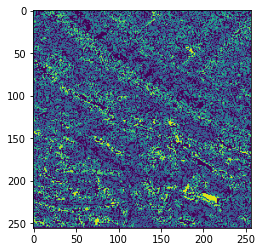

In [146]:
def bitPlane(img, bitplane):
    for i in range(len(img)):
        for j in range(len(img[i])):
            if (img[i][j] >> bitplane) & 1 == 1:
                img[i][j] = img[i][j]
            else:
                img[i][j] = 0
    plt.imshow(img)


bitPlane(aerial, 3)


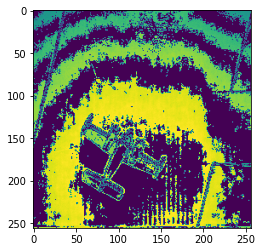

In [147]:
bitPlane(airplane, 4)


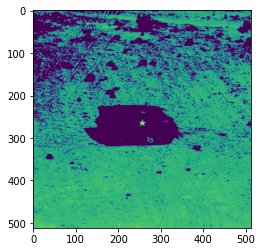

In [148]:
bitPlane(APC, 7)


# 3. Binary Image Processing


In [149]:
from matplotlib import pyplot as plt, image as mpimg

airplane = mpimg.imread("airplane.tiff")
truck = mpimg.imread("truck.tiff")
airport = mpimg.imread("airport.tiff")
APC = mpimg.imread("APC.tiff")


In [150]:
def normalize(colors, max_value):
    for (i, color) in enumerate(colors):
        colors[i] = color / max_value * 100
    return colors


def histogram(img):
    colors = [0] * 256
    max_value = 0
    for (i, row) in enumerate(img):
        for (j, pixel) in enumerate(row):
            colors[pixel] += 1
            max_value = max(max_value, colors[pixel])
    plt.plot(normalize(colors, max_value))


## 3.1 Histogram and modality

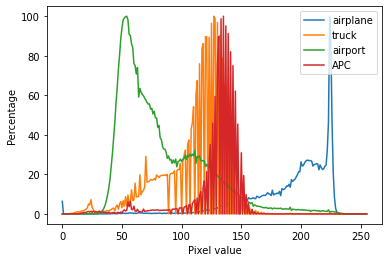

In [151]:
histogram(airplane)
histogram(truck)
histogram(airport)
histogram(APC)
plt.legend(["airplane", "truck", "airport", "APC"])
plt.ylabel("Percentage")
plt.xlabel("Pixel value")
plt.show()


- All images are unimodal


## 3.2 Binarize the images


In [152]:
def binarize(img, threshold):
    for (i, row) in enumerate(img):
        for (j, pixel) in enumerate(row):
            if pixel < threshold:
                img[i][j] = 0
            else:
                img[i][j] = 255
    return img


binarizedAirplane = binarize(airplane, 190)
binarizedTruck = binarize(truck, 90)
binarizedAirport = binarize(airport, 80)
binarizedAPC = binarize(APC, 80)


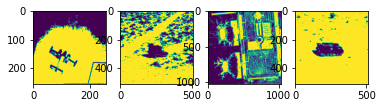

In [153]:
f, arr = plt.subplots(1, 4)

arr[0].imshow(binarizedAirplane)
arr[1].imshow(binarizedTruck)
arr[2].imshow(binarizedAirport)
arr[3].imshow(binarizedAPC)

## 3.3 Otsu's algorithm

In [154]:
# Incomplete

## 3.4 Connected Components


In [155]:
def connected_components(img) :
    components = []
    visited = [[False for _ in row] for row in img]
    for (i, row) in enumerate(img):
        for (j, pixel) in enumerate(row):
            if pixel == 255 and not visited[i][j]:
                component = []
                queue = [(i, j)]
                while len(queue) > 0:
                    (i, j) = queue.pop()
                    visited[i][j] = True
                    component.append((i, j))
                    if i > 0 and img[i - 1][j] == 255 and not visited[i - 1][j]:
                        queue.append((i - 1, j))
                    if i < len(img) - 1 and img[i + 1][j] == 255 and not visited[i + 1][j]:
                        queue.append((i + 1, j))
                    if j > 0 and img[i][j - 1] == 255 and not visited[i][j - 1]:
                        queue.append((i, j - 1))
                    if j < len(img[0]) - 1 and img[i][j + 1] == 255 and not visited[i][j + 1]:
                        queue.append((i, j + 1))
                components.append(component)
    return components


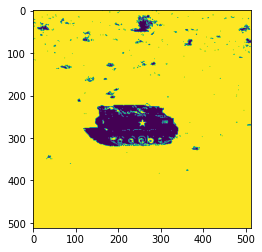

In [156]:
temp = binarizedAPC.copy()
components = connected_components(binarizedAPC)
for (j, (x, y)) in enumerate(components[0]):
    temp[x][y] = 255
for (j, (x, y)) in enumerate(components[1]):
    temp[x][y] = 0

plt.imshow(temp)


## 3.5 Minor blob removal


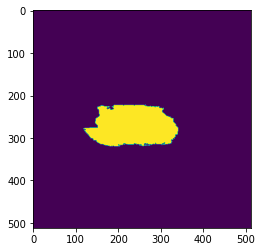

In [157]:
def max_blob(img):
    max_size = 0
    max_component = None
    components = connected_components(img)
    for component in components:
        size = len(component)
        if size > max_size:
            max_size = size
            max_component = component
    return max_component

def minor_blob_removal(img):
    r = img.copy()
    for (i, row) in enumerate(img):
        for (j, pixel) in enumerate(row):
            r[i][j] = 0
    max_component = max_blob(img)
    for (i, j) in max_component:
        r[i][j] = 255
    return r

def complement_image(img):
    r = img.copy()
    for (i, row) in enumerate(img):
        for (j, pixel) in enumerate(row):
            r[i][j] = 255 - pixel
    return r

plt.imshow(minor_blob_removal(complement_image(minor_blob_removal(binarizedAPC))))
